In [1]:
!cd

C:\Users\valya\PycharmProjects\val1\Martynov\MachineLearningCourseLabs\Martynov


Загрузим необходимые библиотеки и выведем на экран таблицу с данными:

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/raw/Summary_of_Weather.csv')
df.head()

C:\Users\valya\AppData\Local\Temp\ipykernel_8652\1522097751.py:7: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/raw/Summary_of_Weather.csv')


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выведем информацию по таблице в текстовом виде:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110707 entries, 0 to 110706
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          110707 non-null  int64  
 1   Date         110707 non-null  object 
 2   Precip       110707 non-null  object 
 3   WindGustSpd  495 non-null     float64
 4   MaxTemp      110707 non-null  float64
 5   MinTemp      110707 non-null  float64
 6   MeanTemp     110707 non-null  float64
 7   Snowfall     109640 non-null  object 
 8   PoorWeather  31850 non-null   object 
 9   YR           110707 non-null  int64  
 10  MO           110707 non-null  int64  
 11  DA           110707 non-null  int64  
 12  PRCP         108914 non-null  object 
 13  DR           496 non-null     float64
 14  SPD          495 non-null     float64
 15  MAX          110263 non-null  float64
 16  MIN          110272 non-null  float64
 17  MEA          110243 non-null  float64
 18  SNF          109640 non-

Заметим, что значения столбцов под номерами 3,8,13,14-30 имеют больше количество нулевых значений. В случае с 9-12, 15-18 можно судить о наличии настоящих нулевых значений, в остальных же случаях отсутствуют данные как таковые.

<AxesSubplot:>

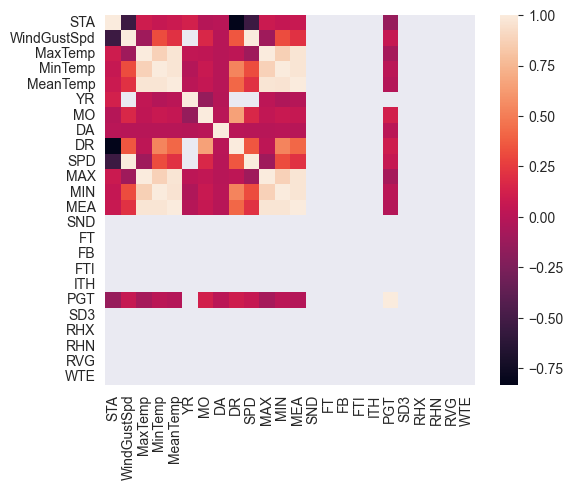

In [4]:
corr = df.corr()
sns.heatmap(corr, square=True)

Таблица корреляций подтверждает нашу гипотезу. Выделим коллелирующие значения из таблицы и рассмотрим их отдельно

In [5]:
df = df[['Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall', 'YR', 'MO']]
df.head()

,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO
0,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,42,7
1,1942-7-2,0,28.888889,21.666667,25.555556,0.0,42,7
2,1942-7-3,2.54,26.111111,22.222222,24.444444,0.0,42,7
3,1942-7-4,2.54,26.666667,22.222222,24.444444,0.0,42,7
4,1942-7-5,0,26.666667,21.666667,24.444444,0.0,42,7


<AxesSubplot:>

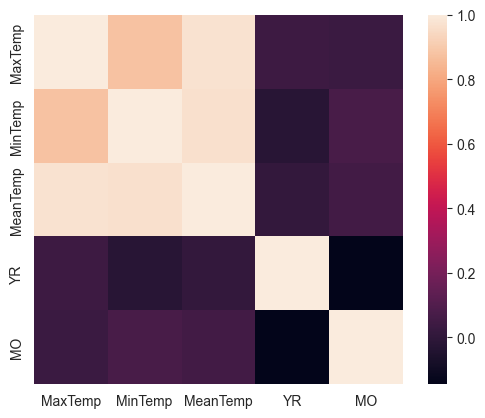

In [6]:
corr = df.corr()
sns.heatmap(corr, square=True)

Безусловно, самая сильная корреляция проходит между значениями температур.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110707 entries, 0 to 110706
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      110707 non-null  object 
 1   Precip    110707 non-null  object 
 2   MaxTemp   110707 non-null  float64
 3   MinTemp   110707 non-null  float64
 4   MeanTemp  110707 non-null  float64
 5   Snowfall  109640 non-null  object 
 6   YR        110707 non-null  int64  
 7   MO        110707 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.8+ MB


Построим графики зависимостей температур:

(0.0, 54.138888889)

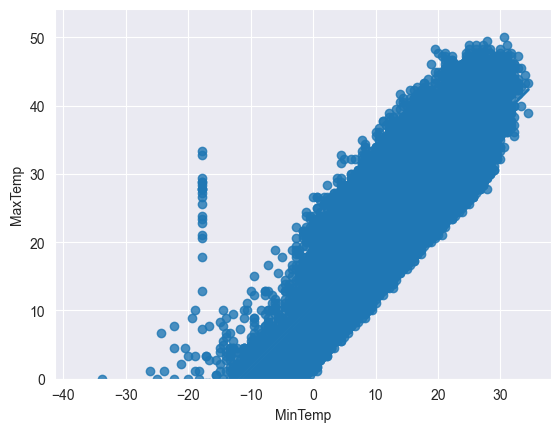

In [8]:
sns.regplot(x='MinTemp', y = 'MaxTemp', data = df)
sns.set_style('whitegrid')
plt.ylim(0,)

C:\Users\valya\AppData\Local\Temp\ipykernel_8652\2190166466.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MaxTemp']);


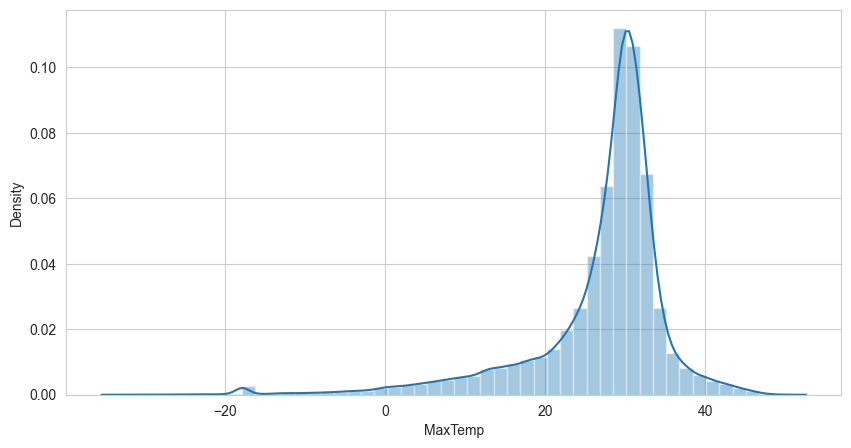

In [9]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(df['MaxTemp']);

C:\Users\valya\AppData\Local\Temp\ipykernel_8652\4184730143.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MinTemp']);


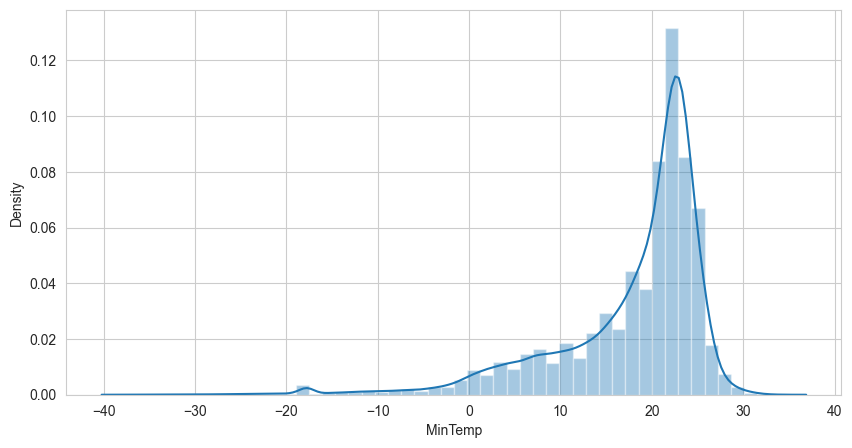

In [10]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(df['MinTemp']);

  Анализ данных показал, что в необходимой для анализа мере коррелируют между собой лишь несколько столбцов данных - напрямую связанные с температурой и временем, а также с осадками в виде снега и чистыми осадками в миллиметрах. Значения температур линейны относительно друг друга (построены также графики плотности - они визуально схожи), поэтому для анализа оставим значения осадок и времени.